<a href="https://colab.research.google.com/github/Whdfs23/Wdhfs23-Praktikum-Big-Data/blob/main/Praktikum_Big_Data_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Refresher: Basic SQL Operations

In [1]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder \
    .appName("Jupyter Spark Test") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

print("Spark session started!")
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

spark.sql('SELECT * FROM employees').show()


Spark session started!
+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+



2. Advanced Queries (Grouping)

In [2]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



Tugas Tambahan 2 (Penyelesaian) <br>
untuk tiga poin pada Tugas Tambahan 2, masih menggunakan temp view employees dari Tugas 1.

In [3]:
# 1. Cari rata-rata gaji per departemen.
# (Catatan: Data departemen belum di-join, jadi kita group by DeptId)
print("Tugas Tambahan 2.1: Rata-rata gaji per DeptId")
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
''').show()

# 2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
# (Menggunakan subquery dalam klausa WHERE)
print("Tugas Tambahan 2.2: Gaji di atas rata-rata gender")
spark.sql('''
SELECT Name, Gender, Salary
FROM employees e
WHERE e.Salary > (SELECT AVG(Salary)
                  FROM employees
                  WHERE Gender = e.Gender)
''').show()

# 3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
# (Menggunakan window function RANK())
print("Tugas Tambahan 2.3: Ranking karyawan dalam departemen")
spark.sql('''
SELECT Name, DeptId, Salary,
       RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as rank_in_dept
FROM employees
''').show()

Tugas Tambahan 2.1: Rata-rata gaji per DeptId
+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+

Tugas Tambahan 2.2: Gaji di atas rata-rata gender
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+

Tugas Tambahan 2.3: Ranking karyawan dalam departemen
+-----+------+------+------------+
| Name|DeptId|Salary|rank_in_dept|
+-----+------+------+------------+
|James|     1|  3000|           1|
|  Lee|     1|  2700|           2|
| Anna|     2|  4100|           1|
+-----+------+------+------------+



3. Penggunaan Window Functions

In [4]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



4. Advanced Spark SQL Queries (Joins)

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



5. Latihan Mandiri (Window Function & Aggregates)

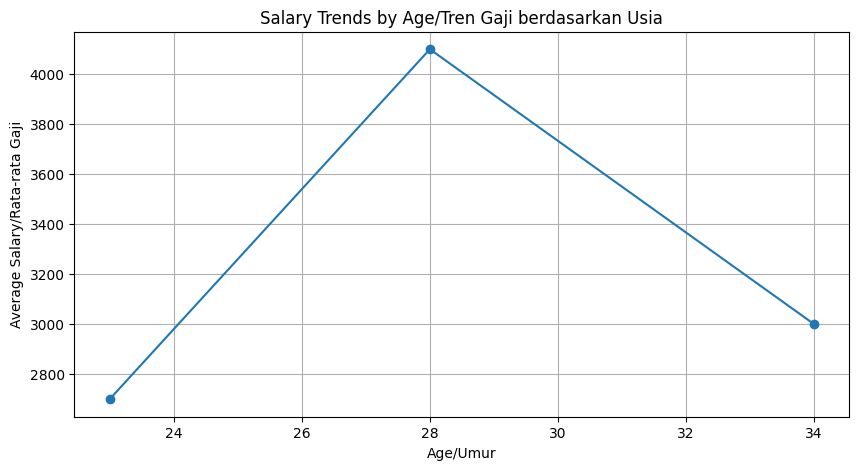

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age/Umur')
plt.ylabel('Average Salary/Rata-rata Gaji')
plt.title('Salary Trends by Age/Tren Gaji berdasarkan Usia')
plt.grid(True)
plt.show()


# Tugas
**#1 Analisis Total Gaji per Departemen**

+------+------------+---------------+
|DeptId|Total_Salary|Total_Employees|
+------+------------+---------------+
|     1|       11700|              3|
|     2|       12800|              3|
|     3|        9700|              2|
+------+------------+---------------+



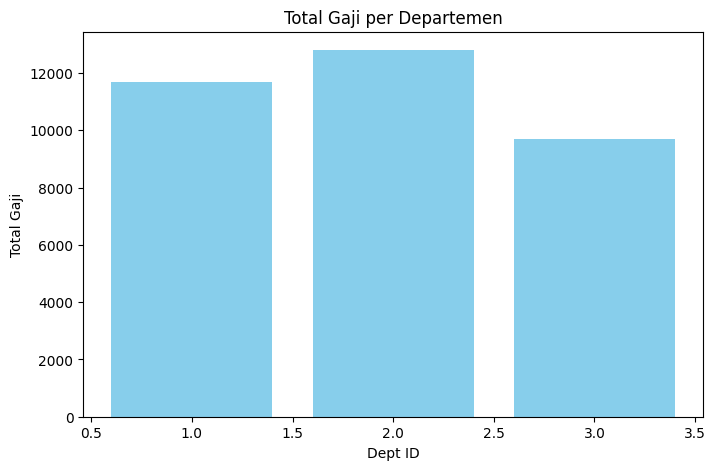

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as spark_sum, count
import matplotlib.pyplot as plt
import random

# 2️⃣ Buat SparkSession
spark = SparkSession.builder \
    .appName("Hands_On_Pertemuan_9_Homework") \
    .getOrCreate()

# 3️⃣ Dataset Awal
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Nina', 40, 'F', 5200, 3),
    ('Mark', 30, 'M', 3900, 2),
    ('Sophia', 26, 'F', 4500, 3),
    ('John', 50, 'M', 6000, 1),
    ('Lina', 32, 'F', 4800, 2)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

result1 = spark.sql("""
    SELECT DeptId,
           SUM(Salary) AS Total_Salary,
           COUNT(*) AS Total_Employees
    FROM employees
    GROUP BY DeptId
    ORDER BY DeptId
""")

result1.show()

# Visualisasi
pandas_df1 = result1.toPandas()
plt.figure(figsize=(8, 5))
plt.bar(pandas_df1['DeptId'], pandas_df1['Total_Salary'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Dept ID')
plt.ylabel('Total Gaji')
plt.show()

**Tugas** <br>
**#2 Karyawan dengan Gaji di Atas Rata-rata Usia**

+--------+------------------+
|AgeGroup|         AvgSalary|
+--------+------------------+
|      20|3766.6666666666665|
|      40|            5200.0|
|      30|            3900.0|
|      50|            6000.0|
+--------+------------------+

+------+---+------+--------+
|  Name|Age|Salary|AgeGroup|
+------+---+------+--------+
|  Anna| 28|  4100|      20|
|Sophia| 26|  4500|      20|
|  Lina| 32|  4800|      30|
+------+---+------+--------+



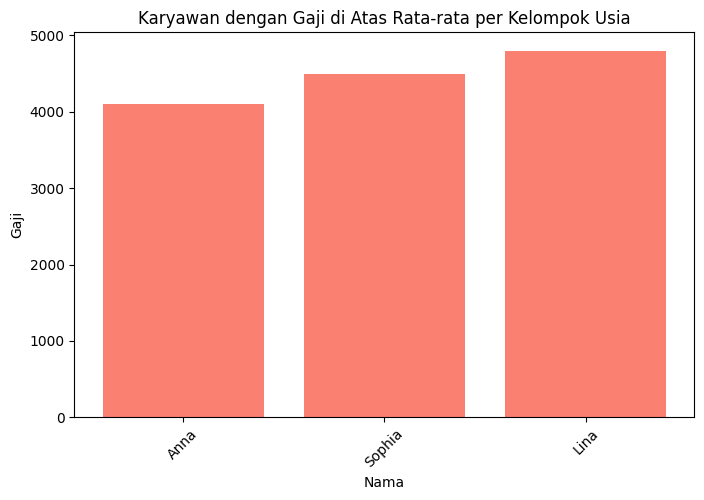

In [8]:
df_age_group = df.withColumn(
    "AgeGroup",
    (col("Age") / 10).cast("int") * 10  # contoh: usia 34 jadi 30-an
)
df_age_group.createOrReplaceTempView('employees_age')

# Query rata-rata per kelompok usia
spark.sql("""
    SELECT AgeGroup, AVG(Salary) as AvgSalary
    FROM employees_age
    GROUP BY AgeGroup
""").show()

# Ambil yang gajinya di atas rata-rata
result2 = spark.sql("""
    WITH avg_salary AS (
        SELECT AgeGroup, AVG(Salary) AS AvgSalary
        FROM employees_age
        GROUP BY AgeGroup
    )
    SELECT e.Name, e.Age, e.Salary, e.AgeGroup
    FROM employees_age e
    JOIN avg_salary a ON e.AgeGroup = a.AgeGroup
    WHERE e.Salary > a.AvgSalary
    ORDER BY e.AgeGroup
""")

result2.show()

# Visualisasi
pandas_df2 = result2.toPandas()
plt.figure(figsize=(8, 5))
plt.bar(pandas_df2['Name'], pandas_df2['Salary'], color='salmon')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.xlabel('Nama')
plt.ylabel('Gaji')
plt.xticks(rotation=45)
plt.show()

**Tugas**<br>
 **#3 Analisis Mendalam (Lanjutan)**

+----------+---------------+-----------------+------------+
|  DeptName|Total_Employees|       Avg_Salary|Total_Salary|
+----------+---------------+-----------------+------------+
|Operations|             26|           4889.0|      127114|
| Marketing|             22|5176.409090909091|      113881|
|   Finance|             20|          4881.25|       97625|
|        IT|             17|4969.470588235294|       84481|
|        HR|             15|4742.866666666667|       71143|
+----------+---------------+-----------------+------------+



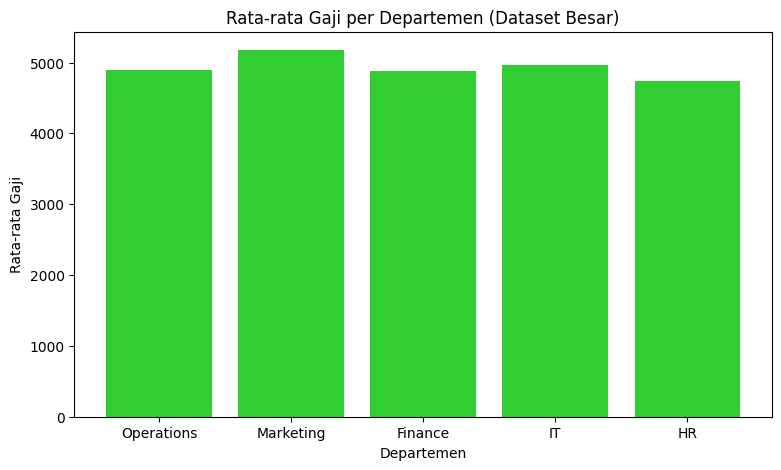

In [9]:
departments = [1, 2, 3, 4, 5]
names = ["Alex", "Brian", "Cindy", "Diana", "Evan", "Fiona", "George", "Hana", "Ivan", "Julia"]
data_large = [
    (random.choice(names) + str(i),
     random.randint(22, 55),
     random.choice(['M', 'F']),
     random.randint(2500, 8000),
     random.choice(departments))
    for i in range(1, 101)
]

df_large = spark.createDataFrame(data_large, schema=columns)
df_large.createOrReplaceTempView('employees_large')

# Buat tabel departemen tambahan
dept_data = [
    (1, 'IT'),
    (2, 'HR'),
    (3, 'Finance'),
    (4, 'Marketing'),
    (5, 'Operations')
]
dept_columns = ['DeptId', 'DeptName']
dept_df = spark.createDataFrame(dept_data, schema=dept_columns)
dept_df.createOrReplaceTempView('departments')

# Analisis SQL JOIN + fungsi agregat
result3 = spark.sql("""
    SELECT d.DeptName,
           COUNT(e.Name) AS Total_Employees,
           AVG(e.Salary) AS Avg_Salary,
           SUM(e.Salary) AS Total_Salary
    FROM employees_large e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    ORDER BY Total_Salary DESC
""")

result3.show()

# Visualisasi hasil besar
pandas_df3 = result3.toPandas()
plt.figure(figsize=(9, 5))
plt.bar(pandas_df3['DeptName'], pandas_df3['Avg_Salary'], color='limegreen')
plt.title('Rata-rata Gaji per Departemen (Dataset Besar)')
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Gaji')
plt.show()